In [189]:
"""
Import bibliotek potrzebnych przy realizacji projektu
"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [190]:
class MORF:
    def __init__(self, srcImage):
        self.BaseImg = srcImage
        self.GrayImage = cv2.cvtColor(self.BaseImg, cv2.COLOR_BGR2GRAY)
        (self.tmp_thresh, self.BinImage) = cv2.threshold(self.GrayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    def Open(self, srcImage):
        Operator = srcImage.copy()
        kernel = np.ones((24, 24), np.uint8) 
        ErodedOperator = cv2.erode(Operator, kernel, iterations=1)
        OpenOperator = cv2.dilate(ErodedOperator, kernel, iterations=1)
        return OpenOperator
    
    def Close(self, srcImage):
        Operator = srcImage.copy()
        kernel = np.ones((24, 24), np.uint8) 
        DilatedOperator = cv2.dilate(Operator, kernel, iterations=1)
        ClosedOperator = cv2.erode(DilatedOperator, kernel, iterations=1)
        return ClosedOperator
    
    def OW(self, srcImage):
        return np.minimum(srcImage, self.Close(self.Open(self.Close(srcImage))))
    
    def ZW(self, srcImage):
        return np.maximum(srcImage, self.Open(self.Close(self.Open(srcImage))))
    
    def Automediana(self, srcImage):
        return np.maximum(self.Open(self.Close(self.Open(srcImage))) ,self.OW(srcImage))
    
    def GradientMorfologiczny(self, srcImage):
        kernel = np.ones((3, 3), np.uint8) 
        Dil = cv2.dilate(srcImage, kernel, iterations=1)
        Ero = cv2.erode(srcImage, kernel, iterations=1)
        Result = Dil - Ero
        return Result
    
    def GradWewn(self, srcImage):
        kernel = np.ones((3, 3), np.uint8)
        Ero = cv2.erode(srcImage, kernel, iterations=1)
        Result = srcImage - Ero
        return Result

    def GradZewn(self, srcImage):
        kernel = np.ones((3, 3), np.uint8)
        Dil = cv2.dilate(srcImage, kernel, iterations=1)
        Result = Dil - srcImage
        return Result
    
    def LaplasjanMorfologiczny(self, srcImage):
        GrZew = self.GradZewn(srcImage)
        GrWew = self.GradWewn(srcImage)
        Result = GrZew - GrWew
        return Result
    
    def Top_Hat_Filter(self, srcImage):
        OpenImg = self.Open(srcImage)
        Result = srcImage - OpenImg
        return Result

    def Bottom_Hat_Filter(self, srcImage):
        ClosedImg = self.Close(srcImage)
        Result = ClosedImg - srcImage
        return Result

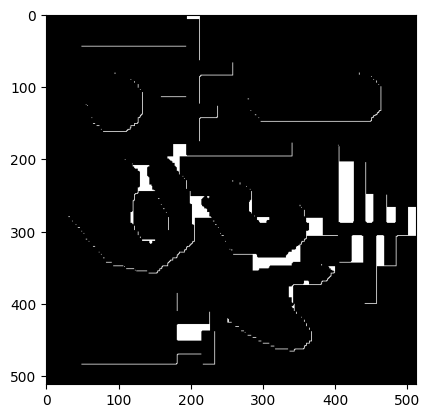

In [191]:
Image = MORF(cv2.imread("Wyklad_Img.bmp"))

plt.imshow(Image.Bottom_Hat_Filter(Image.BinImage), cmap='gray', vmin=0, vmax=255)